Importing Libaries

In [1]:
import tensorflow as tf
from tensorflow  import keras
from keras import Sequential
from keras import activations
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2022-06-29 21:05:51.462570: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-29 21:05:51.514378: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#importing the MNIST dataset and dividing the data for testing and training
(x_train,y_train),(x_test,y_test) =keras.datasets.mnist.load_data()

# here X refers to the feature variable we will feed into the data and Y refers to the target variable or the variable we are training the model to predict 

Studying the Dataset
(we will try to find more about the dataset in order to build the network)

In [3]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
x_train[0].shape

# The model will be trained on 60,000 images and tested on 10000 images
# Each hand written Digit image is 28 x 28 

60000
60000
10000
10000


(28, 28)

Normalizing Data 
(Rescaling the orginal range and bringing the values ranging from 0-255 to 0-1)

In [4]:
x_train = tf.keras.utils.normalize(x_train,axis =1 )
x_test = tf.keras.utils.normalize(x_test,axis =1 )

Creating the Neural Network Model

In [5]:

model= tf.keras.models.Sequential()
#flattening the image vector to one dimension for input layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='sigmoid' )) 
model.add(tf.keras.layers.Dense(10,activation= 'softmax'))


2022-06-29 21:11:04.623675: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-29 21:11:04.639083: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-29 21:11:04.663514: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Aspire-E5-573): /proc/driver/nvidia/version does not exist
2022-06-29 21:11:05.080330: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [62]:
#compiling the model
model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])
#training the model on test data 
history= model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=25)


2022-06-30 02:51:53.307821: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/25
1875/1875 [==============================] - 21s 8ms/step - loss: 8.3527e-05 - accuracy: 1.0000 - val_loss: 0.1324 - val_accuracy: 0.9763
Epoch 2/25
1875/1875 [==============================] - 11s 6ms/step - loss: 5.5035e-05 - accuracy: 1.0000 - val_loss: 0.1336 - val_accuracy: 0.9766
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0472e-04 - accuracy: 1.0000 - val_loss: 0.1444 - val_accuracy: 0.9754
Epoch 4/25
1875/1875 [==============================] - 11s 6ms/step - loss: 5.1580e-05 - accuracy: 1.0000 - val_loss: 0.1406 - val_accuracy: 0.9776
Epoch 5/25
1875/1875 [==============================] - 11s 6ms/step - loss: 2.6724e-05 - accuracy: 1.0000 - val_loss: 0.1390 - val_accuracy: 0.9776
Epoch 6/25
1875/1875 [==============================] - 11s 6ms/step - loss: 2.7119e-05 - accuracy: 1.0000 - val_loss: 0.1412 - val_accuracy: 0.9769
Epoch 7/25
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3176e-05 - accuracy: 1.0000

In [10]:
img= x_train[2]
print(img)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


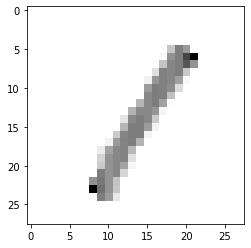

In [13]:
plt.imshow(x_train[23],cmap=plt.cm.binary)
plt.show()

In [60]:
#evaluating model on the test data 
test_loss,test_acc= model.evaluate(x_test,y_test)
print("Test Loss : {}, Test Accuracy : {}".format(test_loss,test_acc))



313/313 [==============================] - 9s 17ms/step - loss: 0.1309 - accuracy: 0.9766
Test Loss : 0.13088026642799377, Test Accuracy : 0.9765999913215637


<Figure size 432x288 with 0 Axes>

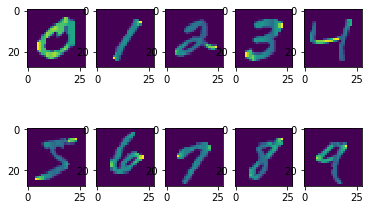

In [14]:
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
f, axarr = plt.subplots(2,5)
axarr[0,0].imshow(x_train[21])
axarr[0,1].imshow(x_train[23])
axarr[0,2].imshow(x_train[5])
axarr[0,3].imshow(x_train[7])
axarr[0,4].imshow(x_train[2])
axarr[1,0].imshow(x_train[0])
axarr[1,1].imshow(x_train[13])
axarr[1,2].imshow(x_train[15])
axarr[1,3].imshow(x_train[17])
axarr[1,4].imshow(x_train[4])

Evaluation 

In [35]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 4ms/step
[[1.2890180e-09 1.8868257e-10 1.5498929e-09 ... 9.9999613e-01
  1.5779024e-08 5.6758861e-08]
 [7.9829594e-11 1.2456752e-05 9.9998707e-01 ... 2.7613836e-12
  2.4705554e-10 9.2107709e-15]
 [3.7097886e-10 9.9996585e-01 7.7836467e-06 ... 3.4366528e-06
  2.2161050e-05 3.5484363e-10]
 ...
 [1.7063625e-13 4.0752821e-11 1.4107780e-11 ... 9.5539860e-07
  5.9459083e-08 2.5480784e-05]
 [4.7413057e-10 2.5316277e-08 3.7113848e-10 ... 5.1336579e-10
  6.4456053e-06 7.4229885e-13]
 [3.0346154e-08 4.3323078e-09 6.1567846e-08 ... 5.9855979e-12
  6.7515209e-11 1.4529678e-11]]
[7 2 1 ... 4 5 6]


In [37]:
#Precision Score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_classes,average='macro')


0.9758115214635724

In [38]:
#Recall Score 
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_classes,average='macro')

0.9758077017243357

In [45]:
print(y_test)
print(y_pred_classes)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

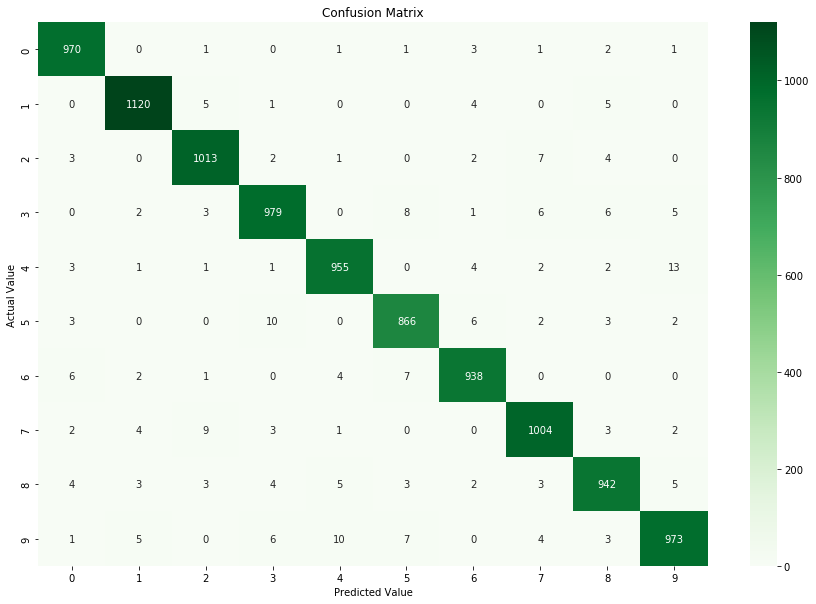

In [43]:
Confusion_Matrix = confusion_matrix(y_test,y_pred_classes)

#visualizing Confusion Matrix
figure,ax = plt.subplots(figsize =(15,10))
ax = sns.heatmap(Confusion_Matrix,annot=True,fmt='d',ax=ax,cmap="Greens")
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Value")
ax.set_title('Confusion Matrix');

In [50]:
#F1
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_classes,average=None)

array([0.98377282, 0.98591549, 0.97969052, 0.97123016, 0.97498724,
       0.97085202, 0.97810219, 0.9761789 , 0.9691358 , 0.9681592 ])

Train VS  Test Data Accuracy  PLOT

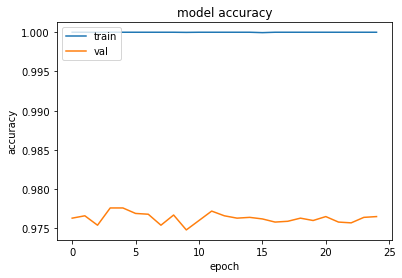

In [65]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

